# autism diagnosis prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("../dataset/autism.csv")
data.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,1,31.527964,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,0,28.427971,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,1,26.484494,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,1,48.203459,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,1,24.167945,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


In [4]:
data.shape

(800, 22)

In [5]:
data.columns.tolist()

['ID',
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'result',
 'age_desc',
 'relation',
 'Class/ASD']

In [6]:
data.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.sample(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
278,279,0,1,1,1,1,1,1,1,1,1,25.274063,m,Black,yes,yes,United States,no,11.813490,18 and more,Self,1
374,375,0,0,0,0,0,0,0,1,0,0,29.228224,m,Middle Eastern,no,no,New Zealand,no,-0.472551,18 and more,Self,0
688,689,1,1,0,1,0,0,0,1,1,1,10.663118,m,Black,no,no,Australia,no,9.808670,18 and more,Self,0
21,22,0,1,1,1,0,1,1,1,1,1,15.367501,f,White-European,no,no,Kazakhstan,no,13.917927,18 and more,Self,0
768,769,1,1,1,1,1,1,1,0,1,1,22.367790,m,White-European,yes,no,Netherlands,no,12.297944,18 and more,Self,0


In [9]:
data["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [11]:
data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [12]:
# converting age from float to int
data["age"] = data["age"].astype(int)
data.sample(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
361,362,1,1,1,1,1,0,1,1,1,1,18,m,Pasifika,no,yes,United Kingdom,no,10.582667,18 and more,Self,0
61,62,0,0,0,0,0,0,0,0,0,0,35,m,?,no,no,Austria,no,2.029616,18 and more,Self,0
683,684,0,0,0,0,0,0,0,0,0,1,54,m,Middle Eastern,no,no,India,no,5.963511,18 and more,Self,0
762,763,1,1,0,0,0,0,1,0,1,0,56,f,?,no,no,India,no,9.485735,18 and more,Self,0
657,658,0,0,0,0,0,0,0,0,0,0,23,m,Asian,no,no,Jordan,no,0.739577,18 and more,Self,0


In [13]:
for column in data.columns:
    numerical_features = ["ID", "age", "result"]
    if column not in numerical_features:
        print(column, data[column].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [14]:
data.sample(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
19,20,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,18 and more,Self,1
105,106,1,1,1,1,1,1,1,1,1,1,34,m,White-European,no,no,United States,no,12.812166,18 and more,Self,0
282,283,0,1,1,1,1,0,1,0,1,1,63,f,White-European,yes,no,United Kingdom,no,10.816806,18 and more,Self,1
584,585,1,1,0,0,0,1,0,0,0,0,41,m,?,no,no,India,no,10.085236,18 and more,Self,0
624,625,0,1,0,0,0,0,0,0,1,0,24,f,?,no,no,New Zealand,no,0.979153,18 and more,Self,0


In [15]:
data = data.drop(columns=["ID", "age_desc"])
data.shape

(800, 20)

In [16]:
data.sample(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
520,1,1,1,1,1,0,1,1,1,1,15,m,White-European,yes,yes,India,no,3.087417,Self,0
264,1,1,1,1,1,1,1,1,1,1,78,m,White-European,no,yes,Canada,no,12.473339,Self,1
131,0,0,0,0,0,0,0,1,1,1,28,m,?,no,yes,New Zealand,no,-1.358064,Parent,0
696,1,1,0,0,0,0,0,1,1,0,13,f,White-European,no,no,Netherlands,no,13.332323,Self,0
710,0,0,0,0,0,0,0,0,0,1,6,m,Middle Eastern,no,no,Sri Lanka,no,14.699918,Parent,0


In [17]:
data["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [18]:
# mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

data["contry_of_res"] = data["contry_of_res"].replace(mapping)
data["contry_of_res"].unique()


array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [19]:
sns.set_theme(
    style="darkgrid"
)

Mean: 27.96375
Median: 24.0


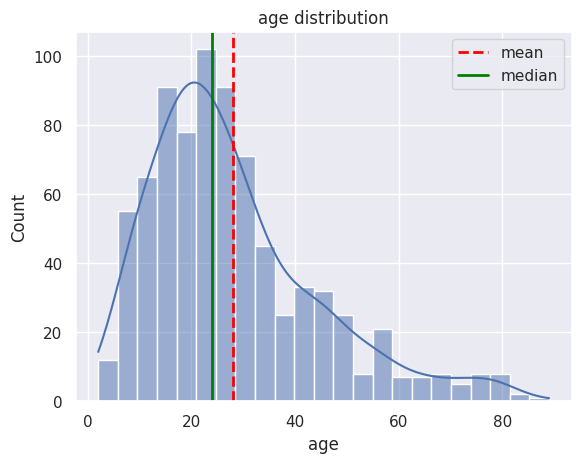

In [20]:
# histogram for age
age_mean = data["age"].mean()
age_median = data["age"].median()
print(f"Mean: {age_mean}")
print(f"Median: {age_median}")

sns.histplot(
    data["age"], kde=True
)
plt.title("age distribution")
plt.axvline(
    age_mean,
    color = "red",
    linestyle = "--",
    linewidth = 2,
    label = "mean"
)
plt.axvline(
    age_median,
    color = "green",
    linestyle = "-",
    linewidth = 2,
    label = "median"
)
plt.legend()
plt.show()

Mean: 8.537303106501248
Median: 9.605299308


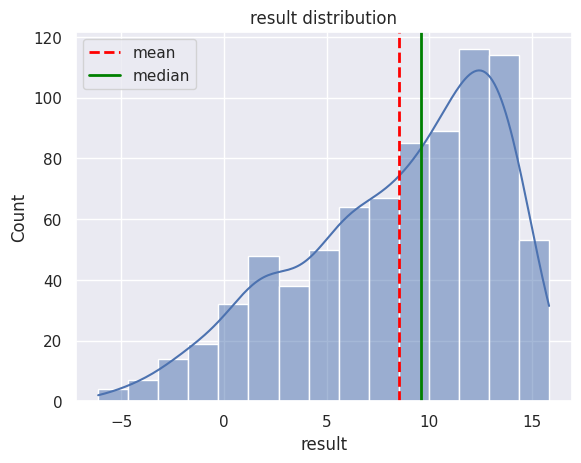

In [21]:
# histogram for result
result_mean = data["result"].mean()
result_median = data["result"].median()
print(f"Mean: {result_mean}")
print(f"Median: {result_median}")

sns.histplot(
    data["result"], kde=True
)
plt.title("result distribution")
plt.axvline(
    result_mean,
    color = "red",
    linestyle = "--",
    linewidth = 2,
    label = "mean"
)
plt.axvline(
    result_median,
    color = "green",
    linestyle = "-",
    linewidth = 2,
    label = "median"
)
plt.legend()
plt.show()

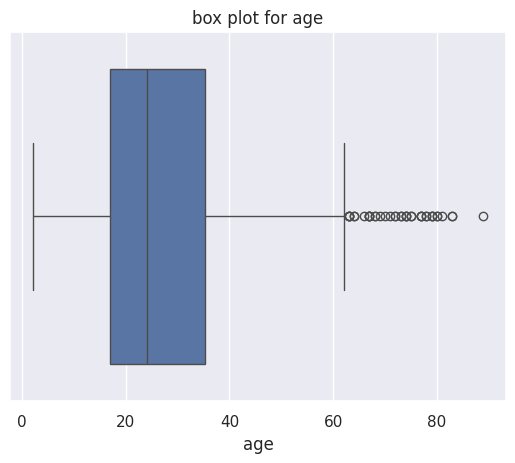

In [26]:
# box plots for identifying outliers

# age boxplot
sns.boxplot(x=data["age"])
plt.title("box plot for age")
plt.xlabel("age")
plt.show()

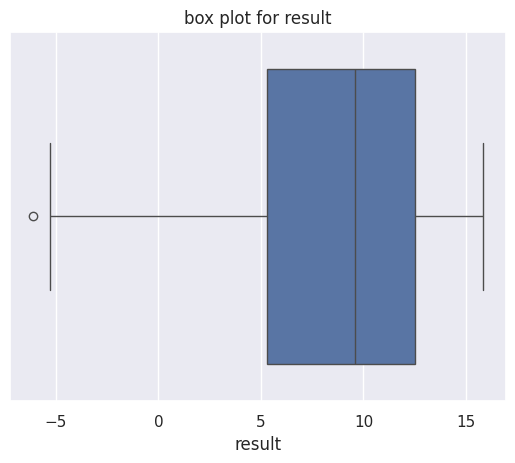

In [25]:
# result boxplot
sns.boxplot(x=data["result"])
plt.title("box plot for result")
plt.xlabel("result")
plt.show()

In [28]:
# count the outliers using iqr method
q1 = data["age"].quantile(0.25)
q3 = data["age"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
age_outliers = data[(data["age"] < lower_bound) | (data["age"] > upper_bound)]
len(age_outliers)

39

In [29]:
# count the outliers using iqr method
q1 = data["result"].quantile(0.25)
q3 = data["result"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
result_outliers = data[(data["result"] < lower_bound) | (data["result"] > upper_bound)]
len(result_outliers)

1

In [31]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

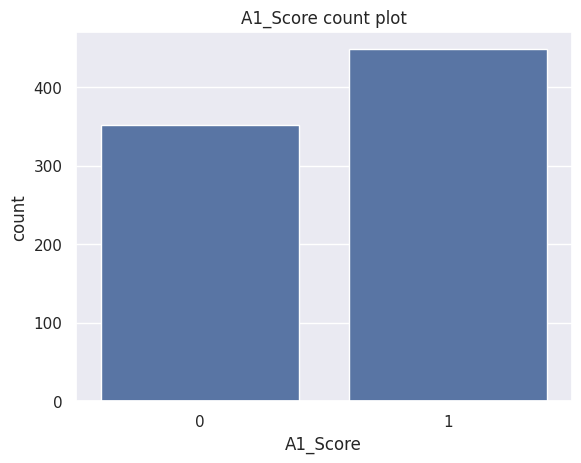

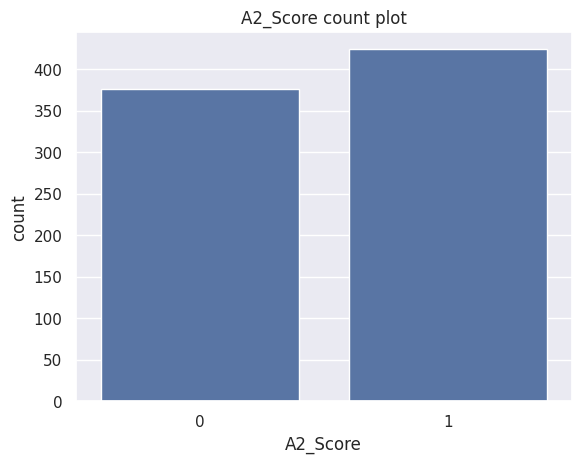

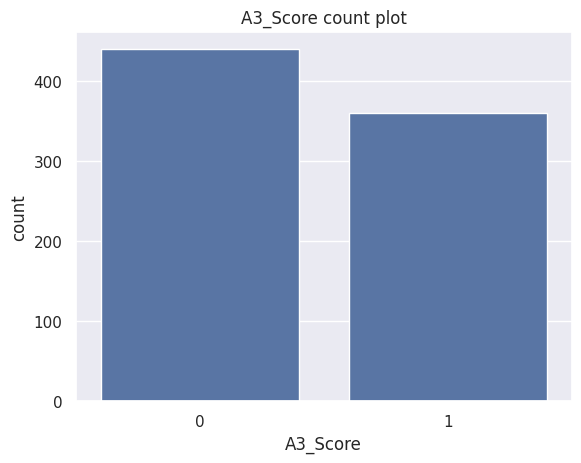

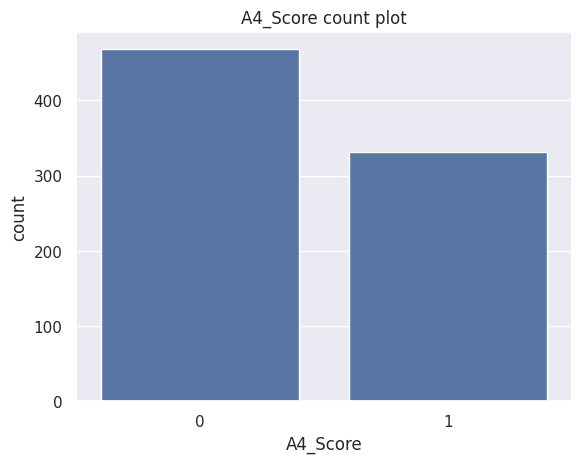

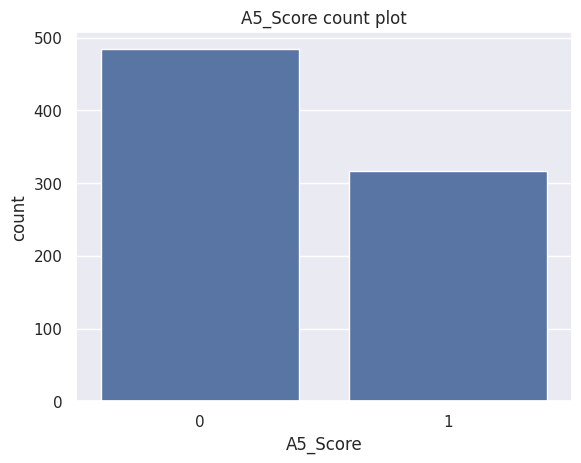

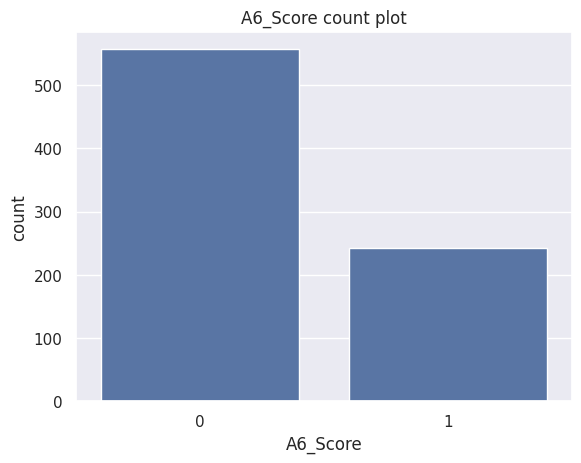

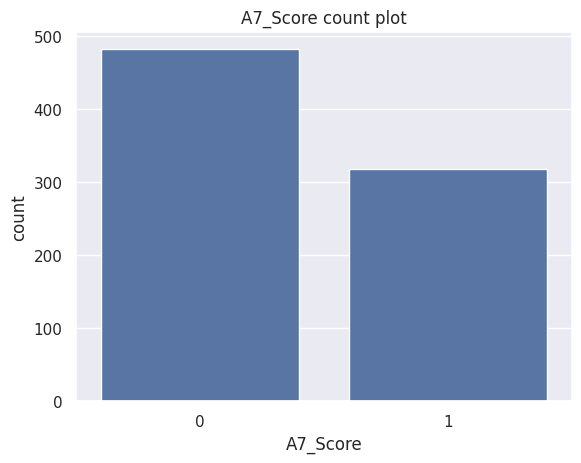

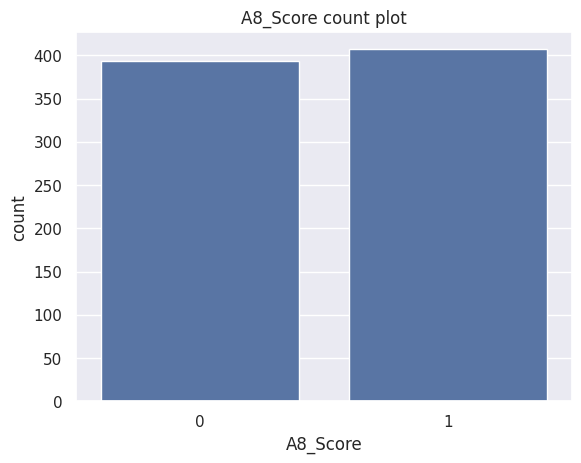

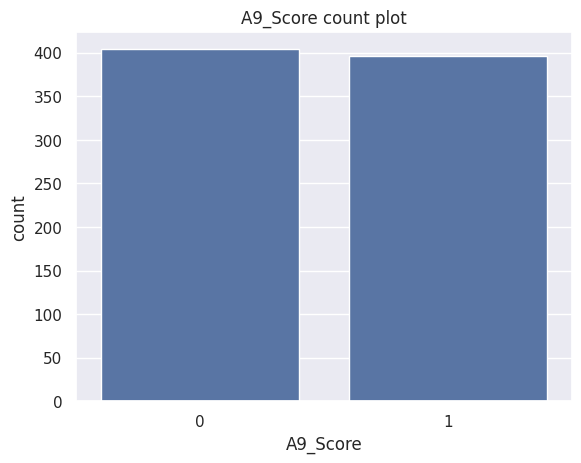

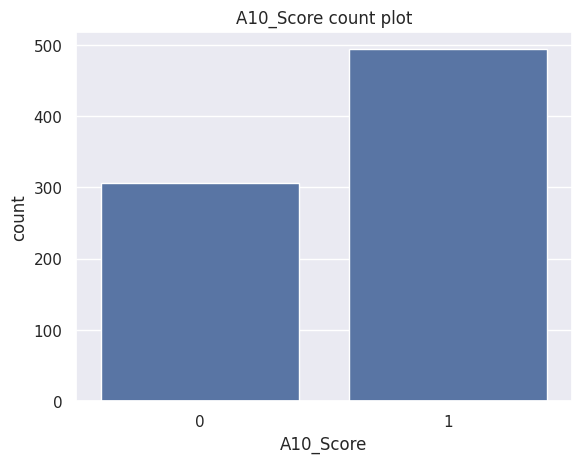

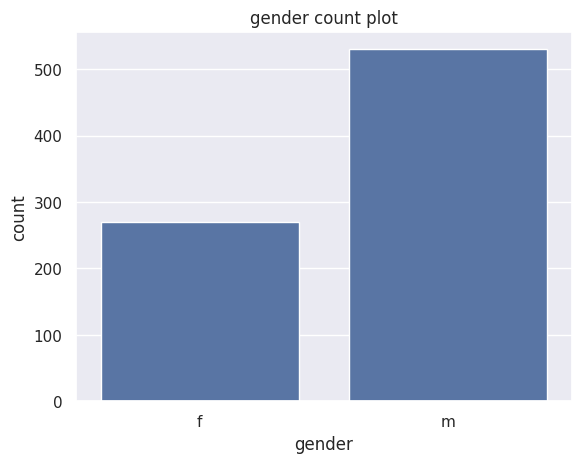

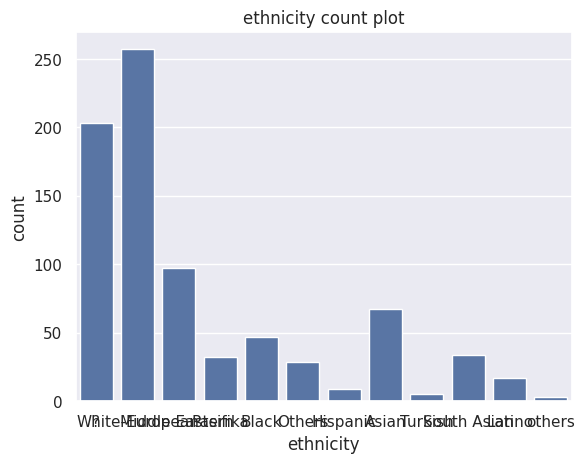

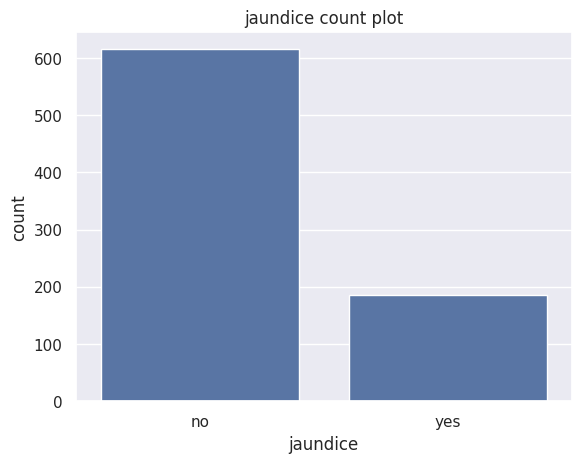

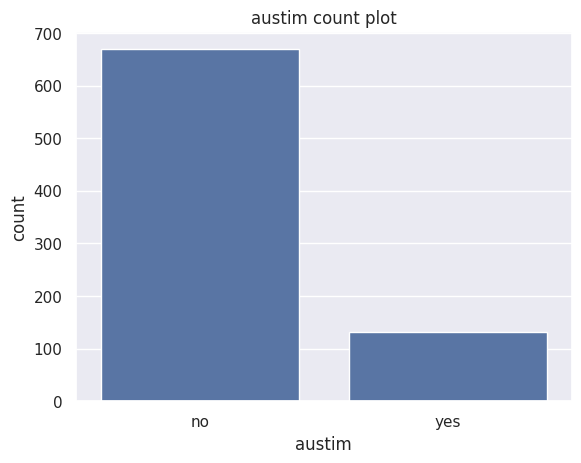

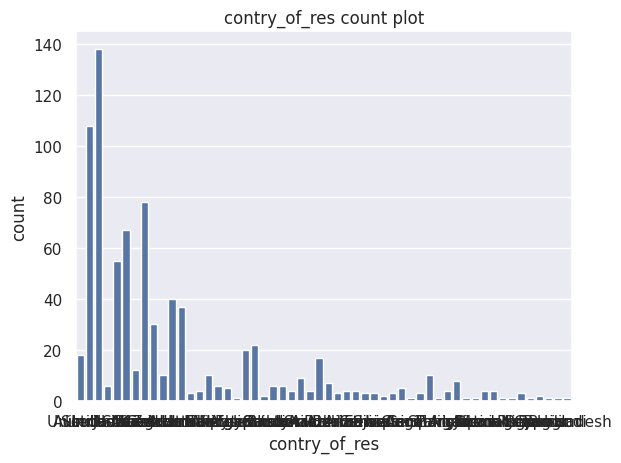

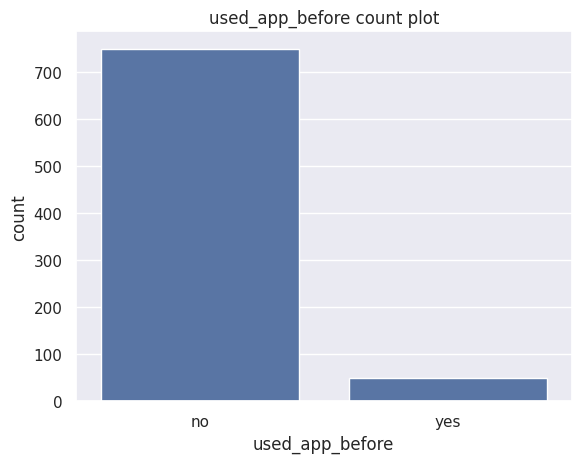

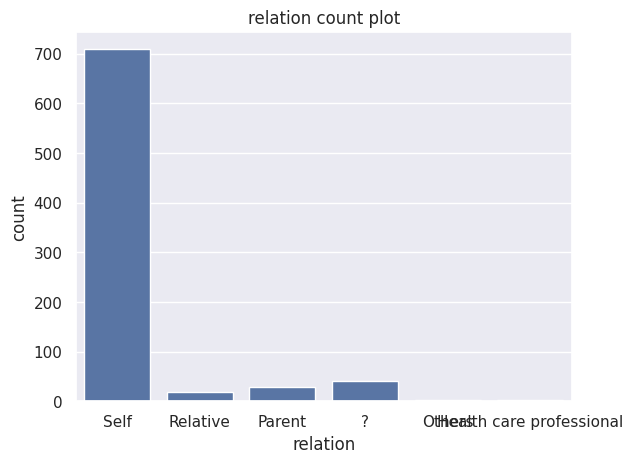

In [34]:
cols_cat = data.drop(columns=["age", "Class/ASD", "result"]).columns.to_list()

for column in cols_cat:
    sns.countplot(x=data[column])
    plt.title(f"{column} count plot")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.show()

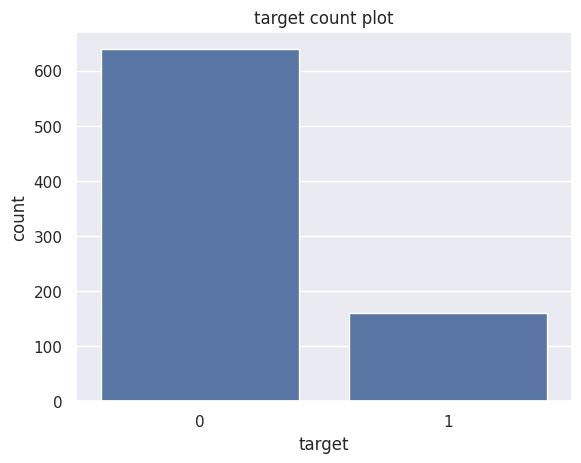

In [35]:
# countplot for target column
sns.countplot(x=data["Class/ASD"])
plt.title(f"target count plot")
plt.xlabel("target")
plt.ylabel("count")
plt.show()

In [37]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [38]:
data["ethnicity"].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [39]:
# handling missing values in rthnicity and relations with the ?
data["ethnicity"] = data["ethnicity"].replace(
    {
        "?": "Others",
        "others": "Others"
    }
)

In [40]:
data["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [41]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


In [42]:
data["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [43]:
data["relation"] = data["relation"].replace(
    {
        "?": "Others",
        "Relative": "Others",
        "Parent": "Others",
        "Health care professional": "Others"
    }
)
data["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [45]:
data.sample(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
153,0,1,1,1,1,0,1,1,0,1,20,m,Pasifika,no,no,United States,no,10.638470,Self,1
303,0,0,0,0,1,0,0,0,1,1,30,m,White-European,no,no,Jordan,no,11.289644,Self,0
564,1,1,1,1,1,1,1,1,1,1,29,m,White-European,no,yes,Brazil,no,14.640233,Others,1
521,1,0,0,0,0,0,0,0,0,1,61,f,Others,no,no,Malaysia,no,1.807809,Self,0
206,0,1,0,1,1,1,0,0,0,1,18,f,South Asian,no,no,New Zealand,no,6.027547,Self,0
311,1,0,1,0,0,0,0,0,1,0,16,m,Black,no,no,Jordan,no,12.386720,Self,0
484,1,0,0,0,0,0,0,0,0,0,38,f,South Asian,no,no,New Zealand,no,4.042704,Self,0
583,0,0,0,0,0,0,0,0,1,1,20,m,Asian,no,no,Ireland,no,4.579505,Self,0
743,0,0,0,0,0,0,0,0,0,0,21,m,Others,no,no,United Arab Emirates,no,0.298784,Self,0
30,1,1,1,1,0,0,0,0,1,1,30,m,White-European,no,no,Malaysia,no,13.189531,Self,1


In [50]:
obj_cols = data.select_dtypes(include=["object"]).columns.to_list()
obj_cols

['gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'relation']

In [52]:
# encoding categorical variables
encoders = {}

for col in obj_cols:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    encoders[col] = label_encoder

# saving the encoders with pickle
with open("../models/encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [53]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [54]:
data.sample(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
659,0,0,1,1,1,1,1,1,1,1,17,1,9,1,1,51,0,12.993303,1,1
254,0,0,0,0,0,0,0,0,0,0,25,1,4,0,0,29,0,7.486502,1,0
267,0,1,0,1,0,0,0,0,0,1,15,1,5,1,0,34,0,10.525981,1,0
288,1,0,1,0,0,0,0,1,0,1,25,0,4,0,0,52,0,13.277167,1,1
189,0,0,0,0,0,0,0,0,1,0,44,1,5,0,0,53,1,-2.184597,1,0
376,0,0,0,0,0,0,0,0,0,1,10,1,5,0,0,34,0,11.771431,1,0
566,1,1,1,1,1,1,1,1,1,1,15,1,9,0,0,52,0,13.875569,1,1
56,0,1,0,1,0,0,0,1,0,1,23,1,5,0,0,30,0,7.965200,1,0
429,0,0,0,0,0,0,0,0,0,0,10,1,0,0,0,23,0,11.902840,1,0
103,1,1,1,1,1,1,1,1,1,1,18,0,9,0,0,52,0,14.319207,1,1


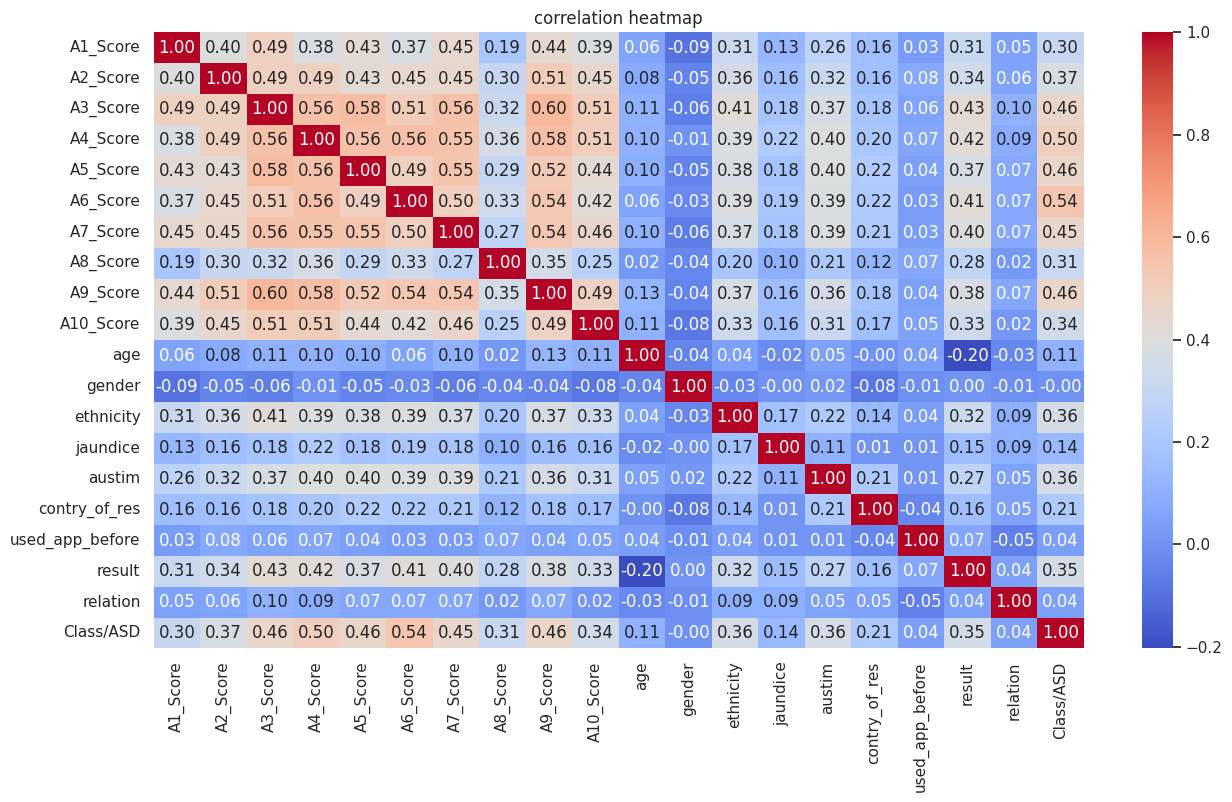

In [55]:
# correlation matrix plot
corr = data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(
    corr,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f"
)
plt.title("correlation heatmap")
plt.show()

In [56]:
# replacing outliers with the median
def outliers_to_median(data, column):
    median = data[column].median()

    q1 = data["result"].quantile(0.25)
    q3 = data["result"].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data[column] = data[column].apply(
        lambda x: median if x < lower_bound or x > upper_bound else x
    )

    return data
